# Gravitational Orbits

In this notebook we will solve the equations of motion for two bodys affected only by gravity. The energies are given by the following:

$\quad T = \frac{1}{2} m_1 (\dot x_1^2 + \dot y_1^2) + \frac{1}{2} m_2 (\dot x_2^2 + \dot y_2^2)$

$\quad U = -\frac{G m_1 m_2}{\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}}$

Solving the Lagrange equations yields the following:

$\quad m_1 \ddot x_1 = - \frac{G m_1 m_2 (x_1 - x_2)}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}$

$\quad m_1 \ddot y_1 = - \frac{G m_1 m_2 (y_1 - y_2)}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}$

$\quad m_2 \ddot x_2 = \frac{G m_1 m_2 (x_1 - x_2)}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}$

$\quad m_2 \ddot y_2 = \frac{G m_1 m_2 (y_1 - y_2)}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [45]:
class Orbit():
    def __init__(self, m1=1, m2=1, G=1):
        self.m1 = m1
        self.m2 = m2
        self.G = G
    
    def r12(self, y):
        """
        Returns the relative distance between two particles.
        
        Parameters
        ==========
        y : float
            a vector with y[0] = x1, y[1] = y1, y[2] = x2, y[3] = y2
        """
        x1, y1, x2, y2 = y[0:4]
        return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    
    def dy_dt(self, t, y):
        """
        Returns the RHS of the d^2x/dt^2 and d^2y/dt^2 for masses 1 and 2.
        
        Parameters
        ==========
        t : float
            time
        y : float
            a vector with y[0] = x1, y[1] = y1, y[2] = x2, y[3] = y2
            y[4] = dx1/dt, y[5] = dy1/dt, y[6] = dx2/dt, and y[7] = dy2/dt
        """
        x1, y1, x2, y2 = y[0:4]
        
        dy_dt_vec = np.zeros(8)
        dy_dt_vec[0:4] = y[4:8]
        dy_dt_vec[4] = self.G * self.m2 * (x2 - x1) / self.r12(y)**3
        dy_dt_vec[5] = self.G * self.m2 * (y2 - y1) / self.r12(y)**3
        dy_dt_vec[6] = self.G * self.m1 * (x1 - x2) / self.r12(y)**3
        dy_dt_vec[7] = self.G * self.m1 * (y1 - y2) / self.r12(y)**3
        
        return dy_dt_vec
        
    def solve_ode(self, t_pts, y_0, abserr=1.0e-10, relerr=1.0e-10):
        return solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y_0, t_eval=t_pts, atol=abserr, rtol=relerr).y
        

# Various Orbits

Now we will implement and view various different orbits.

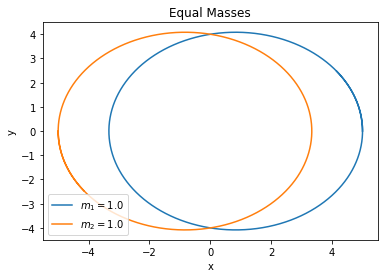

In [46]:
m1 = 1.
m2 = 1.

x1_0 = 5
x2_0 = -5

y1_0 = y2_0 = 0
x1_dot_0 = x2_dot_0 = 0

y1_dot_0 = .2
y2_dot_0 = -m1 / m2 * y1_dot_0

y0 = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0]

orbit = Orbit(m1=m1, m2=m2)

t_pts = np.arange(0, 120., 0.01)
x1, y1, x2, y2, _, _, _, _ = orbit.solve_ode(t_pts, y0)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1, label=rf'$m_1 = {m1:.1f}$')
ax.plot(x2, y2, label=rf'$m_2 = {m2:.1f}$')

ax.set_title('Equal Masses')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower left')

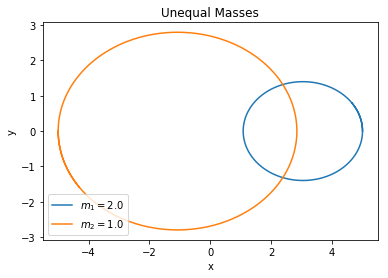

In [42]:
m1 = 2.
m2 = 1.

ratio = -m1 / m2

x1_0 = 5
x2_0 = -5

y1_0 = y2_0 = 0

x1_dot_0 = x2_dot_0 = 0

y1_dot_0 = .1
y2_dot_0 = ratio * y1_dot_0

y0 = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0]

orbit = Orbit(m1=m1, m2=m2)

t_pts = np.arange(0, 60., 0.01)
x1, y1, x2, y2, _, _, _, _ = orbit.solve_ode(t_pts, y0)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1, label=rf'$m_1 = {m1:.1f}$')
ax.plot(x2, y2, label=rf'$m_2 = {m2:.1f}$')

ax.set_title('Unequal Masses')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower left')

# Massive Object

In this section we will see what happens when one of the objects is massive compared to the other. We expect the massive object to not move as the light object orbits around it.

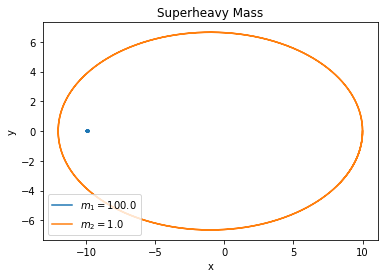

In [44]:
m1 = 100.
m2 = 1.

ratio = -m1 / m2

x1_0 = -10
x2_0 = 10

y1_0 = y2_0 = 0

x1_dot_0 = x2_dot_0 = 0

y1_dot_0 = .01
y2_dot_0 = ratio * y1_dot_0

y0 = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0]

orbit = Orbit(m1=m1, m2=m2)

t_pts = np.arange(0, 50., 0.01)
x1, y1, x2, y2, _, _, _, _ = orbit.solve_ode(t_pts, y0)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1, label=rf'$m_1 = {m1:.1f}$')
ax.plot(x2, y2, label=rf'$m_2 = {m2:.1f}$')

ax.set_title('Superheavy Mass')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower left')
